<h1>Math</h1>

We want to get the line that best fits the data 

Equation of a line : $$ \hat y_i  = ax_i + b $$

Error to minimise : (sum of squared errors) $$E = \sum_{i=1}^{N} (y_i - \hat y_i)^2$$

Where , $y_i$ is the target (actual value) , $\hat y_i$ is the prediction 

Now we want to minimise $E$ so we differentiate !

first substitue $ \hat y_i  = ax_i + b $ into $E$

$$E = \sum_{i=1}^{N}(y_i - (ax_i + b))^2$$

remember $y_i$ and $x_i$ are given , they are the data collected/provided , so the variables to minimise wrt $E$ are actually $a$ and $b$ , since we have 2 variables we make use of partial derivatives

$$\frac{\partial E}{\partial a} = \sum_{i=1}^{N} 2(y_i - (ax_i + b))(-x_i)$$

Now set to 0 (minimise) :

$$\sum_{i=1}^{N} 2(y_i - (ax_i + b))(-x_i) = 0$$

This then becomes : 

$$- \sum_{i=1}^{N} y_i x_i + a\sum_{i=1}^{N}x_i^2 + b \sum_{i=1}^{N} x_i = 0$$

Now , we have 2 unkowns in one equation , we need another equation , so lets differentiate $E$ wrt $b$ and set it to 0 


$$\frac{\partial E}{\partial b} = \sum_{i=1}^{N} 2(y_i - (ax_i + b))(-1) = 0 $$

This then becomes :

$$ \sum_{i=1}^{N} y_i - a\sum_{i=1}^{N} x_i - bN = 0 $$

Now we replace the summations withe letters , to make equations easier to solve :

$$ C = \sum_{i=1}^{N} x_i^2 , D =  \sum_{i=1}^{N} x_i , E =  \sum_{i=1}^{N} y_i x_i , F =  \sum_{i=1}^{N} y_i $$

After substuting in our 2 equations and re-arranging terms we get :

$aC + bD = E$

$aD + bN = F$

we want now to solve these 2 equations simultaneoulsy to get an expression for $a$ and $b$ , solvong it we get 

$b = \frac {ED-FC}{D^2 - NC} , a = \frac {FD - EN}{D^2 - NC}$

Now lets re-substitute for C,D,E,F , we get these monstorous expressions :

$$ a = \frac{ N \sum_{i=1}^{N} x_i y_i - \sum_{i=1}^{N} x_i \sum_{i=1}^{N} y_i }{N \sum_{i=1}^{N} x_i^2 - (\sum_{i=1}^{N} x_i)^2 } ,
b = \frac{ \sum_{i=1}^{N} y_i  \sum_{i=1}^{N} x_i^2 - \sum_{i=1}^{N} x_i \sum_{i=1}^{N} x_i y_i }{N \sum_{i=1}^{N} x_i^2 - (\sum_{i=1}^{N} x_i)^2 } $$

Now to simplify this we can divide tops & bottoms by $N^2$ , if we have $N \sum_{i=1}^{N} x_i $ then divining by $N^2$ we get $\frac{1}{N} \sum_{i=1}^{N} x_i $ which is the mean value of x , we denote it by $\bar x$ , if we have $N \sum_{i=1}^{N} x_i y_i $ we end up with the mean value of xy , denoted $\bar {xy}$ , note how this is different from $\bar x \bar y$ which is the mean of x multiplied by the mean of y

Applying changes to $a$ and $b$ we finally yeild :

$$ a = \frac{\bar {xy} - \bar x \bar y}{\bar {x^2} - \bar x ^2} , b = \frac{ \bar {x^2} \bar {y} - \bar x \, \bar {xy}}{\bar {x^2} - \bar x ^2} $$



<h1>Code</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# reading data
data = pd.read_csv('datasets/data_1d.csv',header=None).to_numpy()
x,y = data[:,0] , data[:,1]

In [3]:
denom = (x**2).mean() - x.mean()**2
a = ((x*y).mean() - x.mean()*y.mean()) / denom
b = ((x**2).mean()*y.mean() - x.mean()*(x*y).mean()) / denom

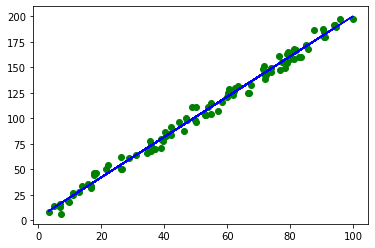

In [4]:
y_hat = a*x + b
plt.scatter(x,y,c='g')
plt.plot(x,y_hat,c='b')
plt.show()

<h1>Math</h1>

Now we want a score to determine how good our model is , we use the r-squared score :

$$ r^2 = 1 - \frac {SS_{res}}{SS_{tot}} $$

$SS_{res}$ (Sum of Squared residual) = $\sum_{i=1}^{N} (y_i - \hat y_i)^2 $

$SS_{tot}$ (Sum of Squared total) = $\sum_{i=1}^{N} (y_i - \bar y)^2 $

Once again , $y_i$ are targets , $\hat y_i$ are predictions , $\bar y$ is mean of targets 

For $r^2$ = 1 , $SS_{res}$ = 0 , this means a perfect prediction 

For $r^2$ = 0 , $SS_{res}$ = $SS_{tot}$ , this means your prediction is as good as the mean of y  (so you actually made nothing)

For $r^2$ < 1  , $SS_{res}$ > $SS_{tot}$ , this means your prediction is actually even worse than the mean


<h1>Code</h1>

In [5]:
delta = y - y_hat
res = delta @ delta
delta = y - y.mean()
tot = delta@delta
r_2 = 1 - res/tot
print('r-squared : ',r_2)

r-squared :  0.9911838202977805


<h1>code<h1>

As a final excercise we want to proove moore's law 

Moore's law states that the transistor count on an integrated circuit doubles each year

We are provided with transistor count for each year and we want to use linear regression to prove it



In [6]:
# now we will read data from file
# some years come in format like 1970[0] , [0] is some sort if a refernce so we remove [0]
# also transistor count has some of those

X = []
Y = []

for line in open('datasets/moore.csv'):
    line = line.split('\t') # file is tab delimited
    x = (line[2]) # thats the year number
    if '[' in x :
        i = x.index('[')
        x = x[:i] # take everything before the [
    X.append(int(x))
    
    y = line[1] # thats the transistor count
    if '[' in y :
        i = y.index('[')
        y = y[:i] # take everything before the [
    if '~' in y :
        i = y.index('~')
        y = y[i+1:]
        
    if 'cca' in y :
        i = y.index('a')
        y = y[i+1:]
    # y comes with , ex: 2,300
    y = ''.join(y.split(','))
    Y.append(int(y))

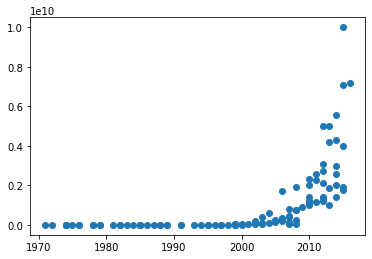

In [7]:
# now lets plot x,y 
X = np.array(X)
Y = np.array(Y)
plt.scatter(X,Y)
plt.show()

The data clearly is not linear

but lets try again with $log(y)$

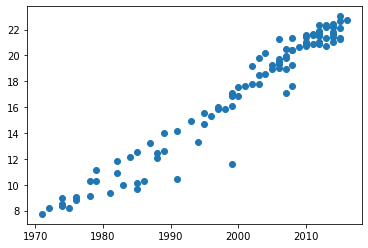

In [8]:
Y = np.log(Y)
plt.scatter(X,Y)
plt.show()

The data became linear !!!

Even if Y is not linear in X , $log(Y)$ is linear in x 

By using log , we can linearise the relation , and thus use linear regression

In [9]:
denom = (X**2).mean() - X.mean()**2
a = ((X*Y).mean() - X.mean()*Y.mean()) / denom
b = ((X**2).mean()*Y.mean() - X.mean()*(X*Y).mean()) / denom

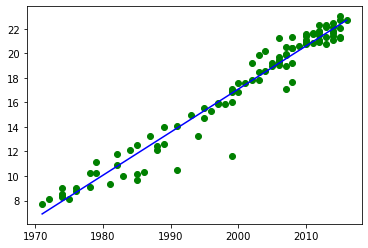

In [10]:
Y_hat = a*X+b
plt.scatter(X,Y,c='g')
plt.plot(X,Y_hat,c='b')
plt.show()

In [11]:
delta = Y - Y_hat
res = delta @ delta
delta = Y - Y.mean()
tot = delta@delta
r_2 = 1 - res/tot
print('r-squared : ',r_2)

r-squared :  0.9529442852285762


<h1>Math</h1>

The High $r^2$ score proves the line fits the data

But how does this help in proving moore's law ?

$log(tc) = a*year + b$ 

tc : transisor count which is y , and year is x

This follows that :

$tc = e^b * e^{a*year}$

$2tc = 2 \, e^b * e^{a*year}$

$2tc = e^{ln(2)} \, e^b * e^{a*year}$

$2tc = e^{ln(2)} \, e^b * e^{a*year}$

$2tc = e^b * e^{a*year+ln(2)}$

now 2tc is double the amount of transistors , this occurs at some year , year 2 so $2tc = e^b * e^{a*year2} $

from this we get :

$e^b * e^{a*year2} = e^b * e^{a*year+ln(2)} $

And so :

$ a*year2 = a*year + ln(2)$

$ year2 = year + ln(2)/a$

so the time to double = year2 - year = ln(2)/a





In [12]:
print('time to double: ', np.log(2)/a , 'years')

time to double:  1.9745331723795398 years


which is approximately 2 years